<a href="https://colab.research.google.com/github/Rashwanth1407/temperature-prediction/blob/main/tempPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()


Saving data_center_31days_24perday.csv to data_center_31days_24perday (1).csv


,Day,Hour,Power_Consumption_kWh,Temperature_C,Server_Load_%
0,1,0,200.5,22,40.0
1,1,1,202.5,23,41.5
2,1,2,204.5,24,43.0
3,1,3,206.5,25,44.5
4,1,4,208.5,26,46.0


In [ ]:
# Create proper time index (Day + Hour)
df['Time_Index'] = df['Day'] * 24 + df['Hour']

df = df.sort_values('Time_Index')

# Select features for prediction
features = ['Temperature_C', 'Power_Consumption_kWh', 'Server_Load_%']
data = df[features]

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [ ]:
def create_sequences(data, seq_length):
    X = []
    y = []

    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  # Predict Temperature

    return np.array(X), np.array(y)

sequence_length = 24  # Use last 24 hours
X, y = create_sequences(scaled_data, sequence_length)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (720, 24, 3)
y shape: (720,)


In [ ]:
X_train, X_test = X[:600], X[600:]
y_train, y_test = y[:600], y[600:]


In [ ]:
model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(32))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 24, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - loss: 0.1810 - val_loss: 0.1179
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.1268 - val_loss: 0.1180
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1157 - val_loss: 0.1205
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1135 - val_loss: 0.1147
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1263 - val_loss: 0.1137
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1179 - val_loss: 0.1204
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1157 - val_loss: 0.1156
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1150 - val_loss: 0.1087
Epoch 9/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.1191 - val_loss: 0.1059
Epoch 10/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1096 - val_loss: 0.1035
Epoch 11/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0996 - val_loss: 0.1059
Epoch 12/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0

In [ ]:
predictions = model.predict(X_test)

# Inverse transform only temperature
temp_scaler = MinMaxScaler()
temp_scaler.fit(df[['Temperature_C']])

predicted_temp = temp_scaler.inverse_transform(predictions)
actual_temp = temp_scaler.inverse_transform(y_test.reshape(-1,1))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


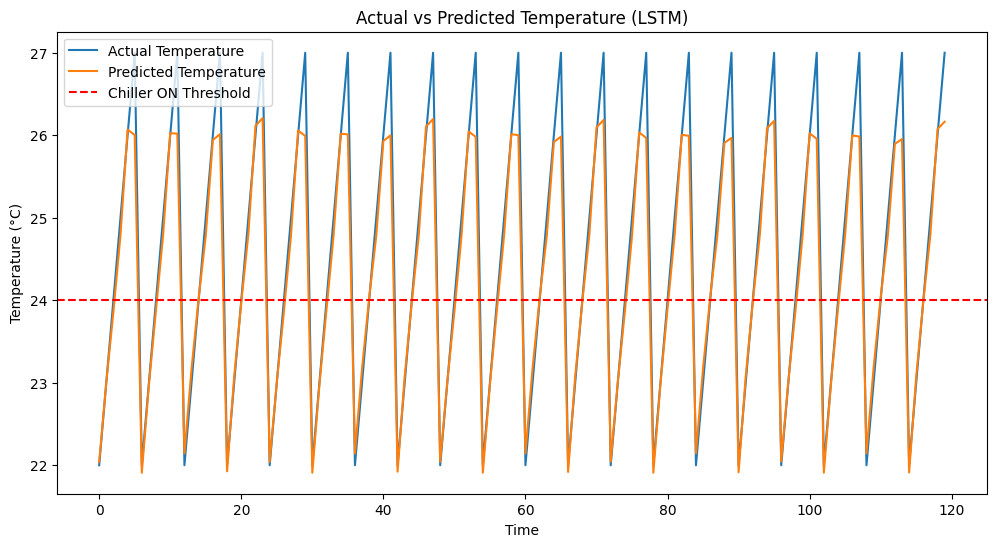

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(actual_temp, label="Actual Temperature")
plt.plot(predicted_temp, label="Predicted Temperature")

threshold = 24
plt.axhline(y=threshold, color='r', linestyle='--', label="Chiller ON Threshold")

plt.title("Actual vs Predicted Temperature (LSTM)")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()



In [ ]:
threshold = 24

for temp in predicted_temp[:20]:
    if temp > threshold:
        print(f"{temp[0]:.2f}°C → CHILLER ON")
    else:
        print(f"{temp[0]:.2f}°C → CHILLER OFF")


22.04°C → CHILLER OFF
23.00°C → CHILLER OFF
23.86°C → CHILLER OFF
24.79°C → CHILLER ON
26.07°C → CHILLER ON
26.00°C → CHILLER ON
21.91°C → CHILLER OFF
22.97°C → CHILLER OFF
23.89°C → CHILLER OFF
24.79°C → CHILLER ON
26.03°C → CHILLER ON
26.02°C → CHILLER ON
22.14°C → CHILLER OFF
23.17°C → CHILLER OFF
24.02°C → CHILLER ON
24.78°C → CHILLER ON
25.94°C → CHILLER ON
26.01°C → CHILLER ON
21.93°C → CHILLER OFF
23.07°C → CHILLER OFF
